Dataset preview:
  Date_reported Sever_Location  Packet_Size  No._of_Packets  Attack_Packets  \
0     3/29/2020           Asia         67.0              91             2.0   
1      4/5/2020           Asia        183.0             274             3.0   
2     4/12/2020           Asia        247.0             521            10.0   
3     4/19/2020           Asia        387.0             908            15.0   
4     4/26/2020           Asia        422.0            1330            13.0   

   Total_Loss(Y)  
0              2  
1              5  
2             15  
3             30  
4             43  


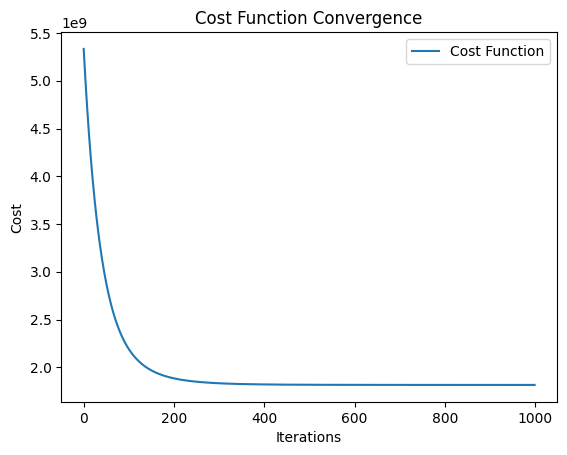

Final parameters (theta):
[[ 3.40571624e+04]
 [-5.37149422e+03]
 [ 6.74609913e+04]
 [ 2.15490880e+04]
 [-8.11112309e+02]
 [-2.60377698e+01]
 [ 3.85789893e+02]
 [ 7.31450167e+02]
 [ 4.30557012e+02]
 [-8.56472512e+02]
 [-2.61377973e+01]
 [ 5.38331500e+02]
 [ 4.12811079e+02]
 [ 7.72061664e+02]
 [ 2.85870509e+02]
 [-8.44782979e+02]
 [-4.27511585e+01]
 [ 4.00137650e+02]
 [ 8.96827613e+02]
 [-7.82867991e+02]
 [ 1.84527695e+02]
 [-7.87970821e+02]
 [-2.90246411e+01]
 [ 3.51443020e+02]
 [ 6.63945420e+01]
 [ 5.92151441e+02]
 [ 6.00390294e+02]
 [ 3.39971798e+02]
 [-6.11587185e+02]
 [-1.89775280e+01]
 [ 5.85340654e+02]
 [ 3.63823580e+02]
 [-5.90207455e+02]
 [ 5.46681090e+02]
 [-8.32982520e+01]
 [ 4.65001961e+02]
 [ 3.73770689e+02]
 [-5.81116421e+02]
 [-1.03512060e+02]
 [ 2.53704576e+02]
 [ 5.44855366e+02]
 [ 4.01520912e+02]
 [-6.28021067e+02]
 [-6.09343272e+01]
 [ 5.84569231e+02]
 [-6.76276384e+02]
 [-1.19529808e+02]
 [ 5.58228050e+02]
 [ 4.52276981e+02]
 [-7.68060811e+02]
 [-2.56278873e+02]
 [ 5.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'Attacks.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset preview:")
print(data.head())

# Data preprocessing
def preprocess_data(data):
    # Drop rows with missing target values
    data = data.dropna(subset=[data.columns[-1]])

    # Handle missing values in features
    data.fillna(data.median(numeric_only=True), inplace=True)

    # Separate features (X) and target (y)
    X = data.iloc[:, :-1]  # All columns except the last one
    y = data.iloc[:, -1]   # The last column is the target variable

    # Encode categorical features using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Normalize numerical features
    X = (X - X.mean()) / X.std()

    # Convert to numpy arrays
    return X.values, pd.to_numeric(y, errors='coerce').values.reshape(-1, 1)

# Preprocess the dataset
X, y = preprocess_data(data)

# Add a column of ones to X for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize parameters
m, n = X.shape
theta = np.zeros((n, 1))

# Define hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000

# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Implement gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * (X.T @ (X @ theta - y))
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Run gradient descent
final_theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Plot the cost function
plt.plot(range(iterations), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.show()

print("Final parameters (theta):")
print(final_theta)
